In [2]:
onedrive = r"C:\Users\mikek\OneDrive"

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path

import shutil

sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

%load_ext autoreload
%autoreload 2


print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


# Impose everything apart from puff and pump

Defining dimension z of size 1
>>> Field Nd+_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc, it will be overwritten
-> Wrote field Nd+_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc
>>> Field Pd+_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc, it will be overwritten
-> Wrote field Pd+_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc
>>> Field Pe_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc, it will be overwritten
-> Wrote field Pe_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc
>>> Field D_d+ already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc, it will be overwritten
-> Wrote field D_d+ to C:\Users\mikek\On

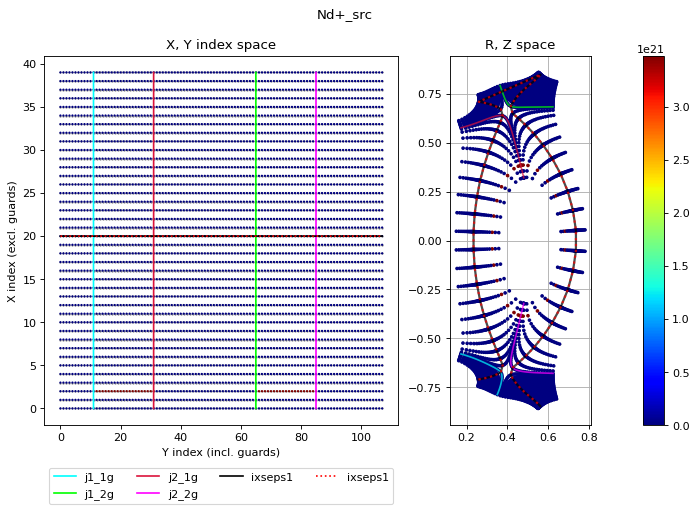

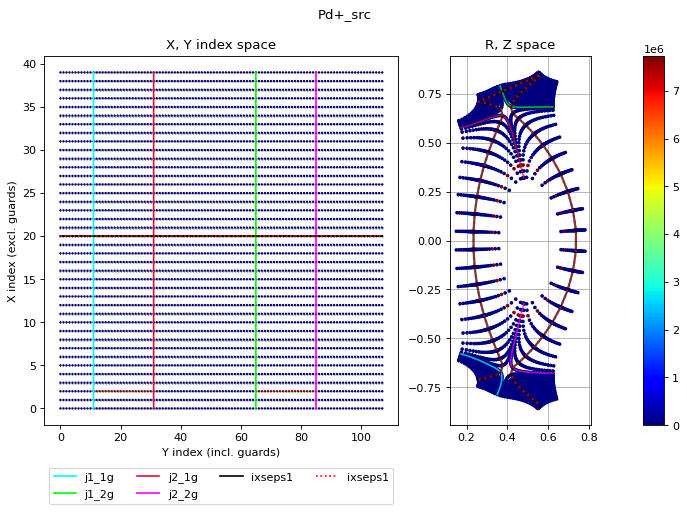

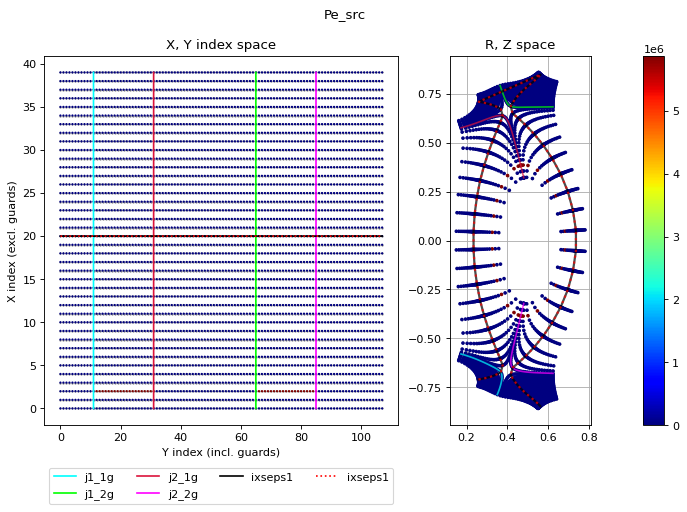

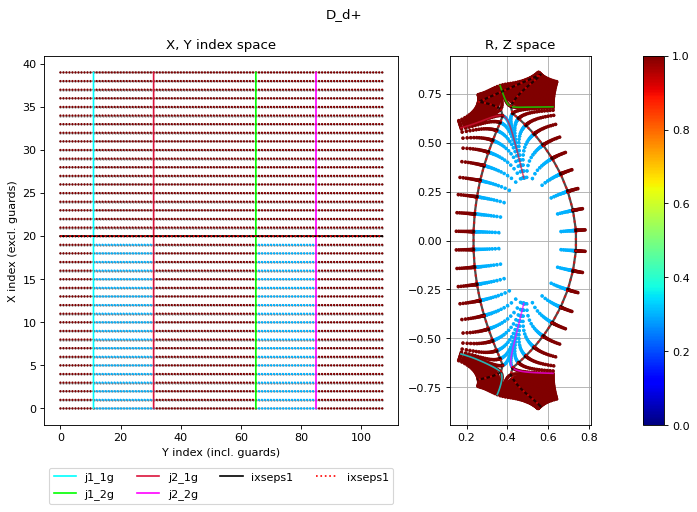

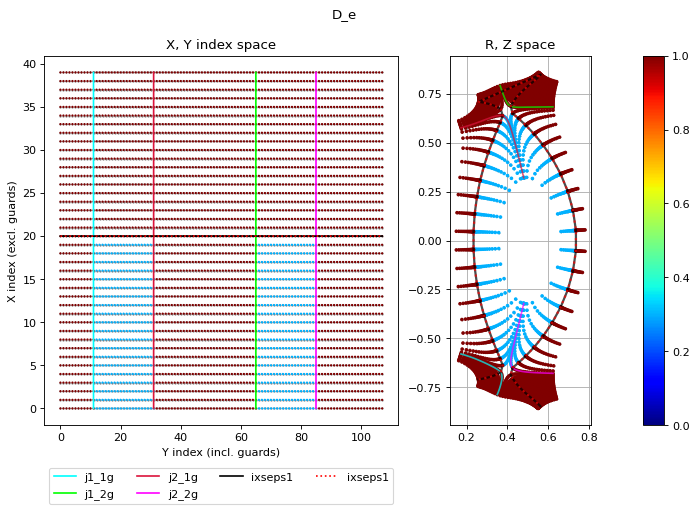

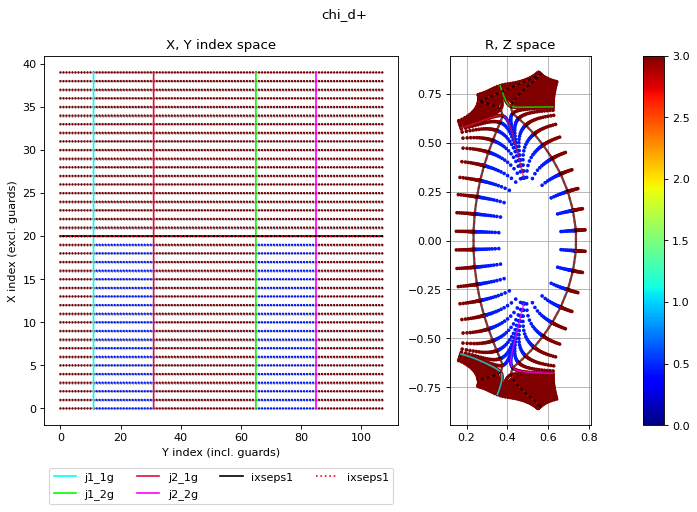

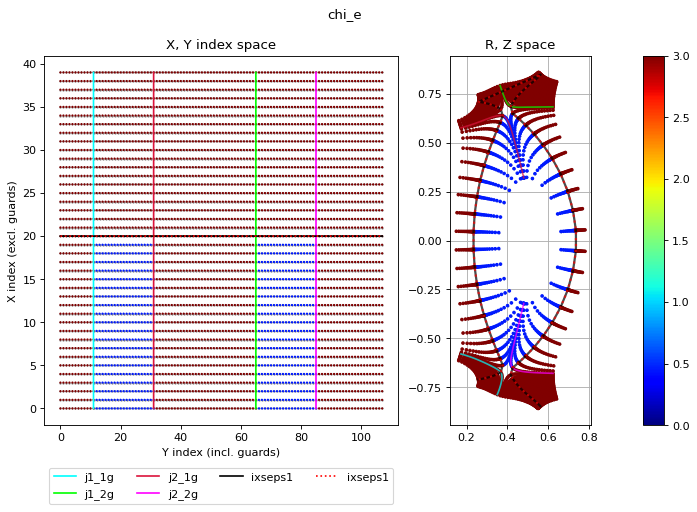

In [4]:
# close_mesh()

impose_fields(
    r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2-fatter_newhypno.nc",
    r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc",
    Ni_src_core = 3e20,
    Pi_src_core = 1e6 * 2/3,   # W converted to pressure
    Pe_src_core = 0.76e6 * 2/3,   # W converted to pressure
    D_core = 0.3,
    chi_core = 0.45,
    D_sol = 1,
    chi_sol = 3
    
)

In [ ]:
mesh.mesh.keys()

# Apply puff

>>> Field Nd_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc, it will be overwritten
-> Wrote field Nd_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc
>>> Field Pd_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc, it will be overwritten
-> Wrote field Pd_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc
Mesh file C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc closed


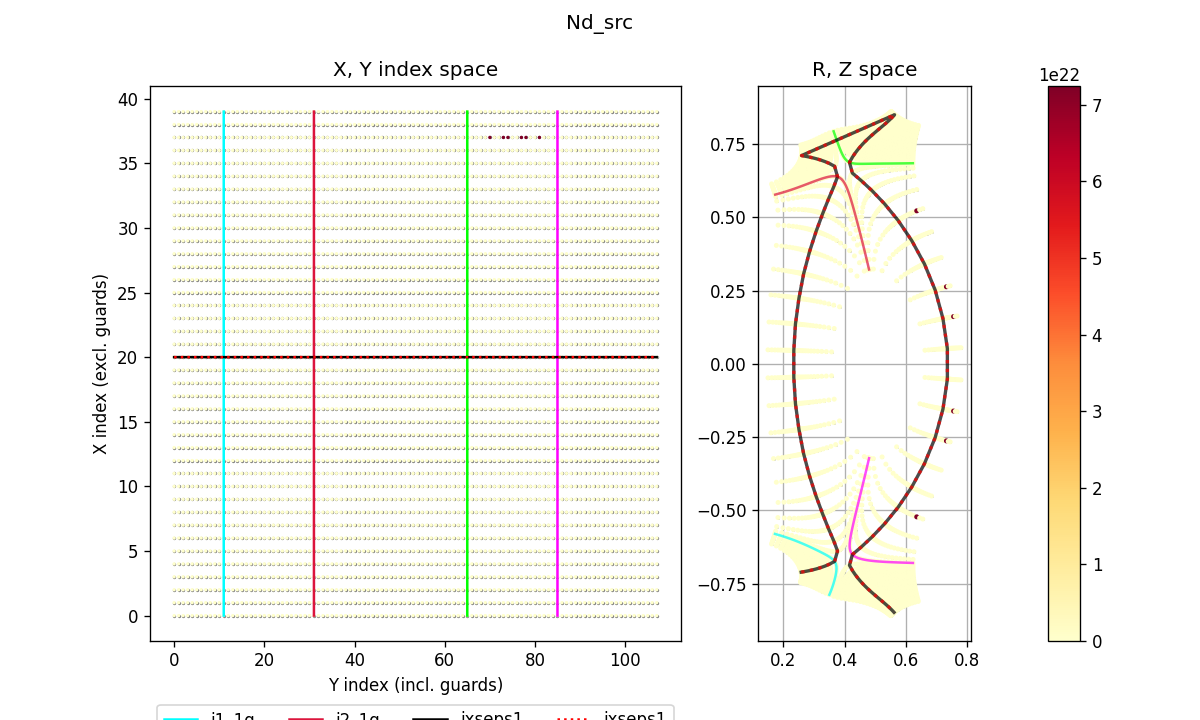

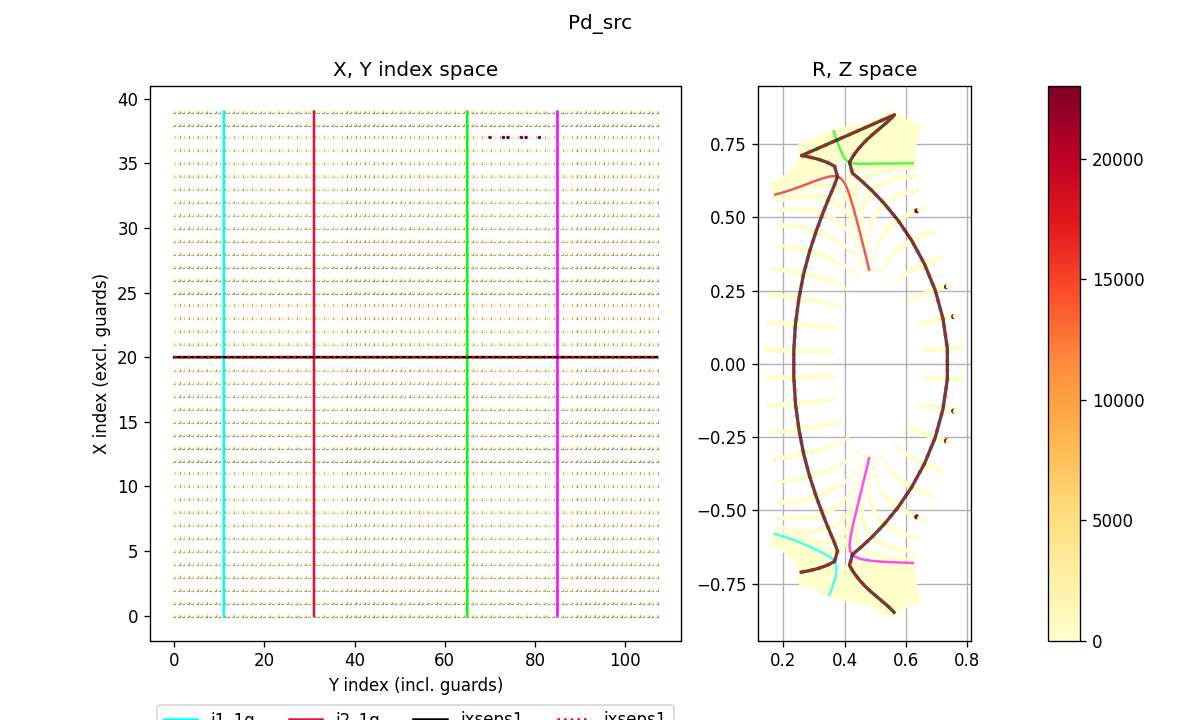

In [56]:
plt.close("all")
%matplotlib widget
mesh = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc")
plt.close("all")

Nd_src = Field("Nd_src", mesh)
Pd_src = Field("Pd_src", mesh)

Nd_src.data[:,:] = 0
Pd_src.data[:,:] = 0


nyg = mesh.mesh["ny"] + 8
list_theta = np.array([nyg-31, nyg-30, nyg-27, nyg-34, nyg-35, nyg-38])
volumes = []

volume = mesh.mesh["dy"] * mesh.mesh["dx"] * mesh.mesh["J"] * 2*np.pi

for i, theta in enumerate(list_theta):
    volumes.append(volume[-3, theta])
    
total_volume = np.sum(volumes)

for i, theta in enumerate(list_theta):
    value = 1.21e21   # s-1
    value = value * (volumes[i]/total_volume)   # s-1 weighted by cell volume
    value = value / volumes[i]   # s-1m-3, source
    Nd_src.data[-3,theta] = value
    
    value = 2/3 * 1.2e21 * 3 * constants("q_e")   # W
    value = value * (volumes[i]/total_volume)   # W weighted by cell volume
    value = value / volumes[i]   # Wm-3, source
    Pd_src.data[-3,theta] = value
    # Nd_src.set_value((-3, theta), value, make_per_volume = False)
    
# Nd_src.set_value((-3, theta), 1.2e21, make_per_volume = True)
# Pd_src.set_value((-3, theta), 2/3 * 1.2e21 * 3 * constants("q_e"), make_per_volume = True)
    

Nd_src.plot(dpi = 120)
Pd_src.plot(dpi = 120)

mesh.write_field(Nd_src, dtype = "Field3D")
mesh.write_field(Pd_src, dtype = "Field3D")

# mesh.mesh.write("is_pump", is_pump.data, info = True)
mesh.close()

## Check puff

In [57]:
2/3 * 1.2e21 * 3 * constants("q_e")

384.52238880000004

In [58]:
mesh = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc")

volume = mesh.mesh["dy"] * mesh.mesh["dx"] * mesh.mesh["J"] * 2*np.pi

print((mesh.mesh["Nd_src"].squeeze() * volume).sum())
print((mesh.mesh["Pd_src"].squeeze() * volume).sum())

mesh.close()

1.2099999999999997e+21
384.52238880000004
Mesh file C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc closed


# Implement pump

Mesh file C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc closed


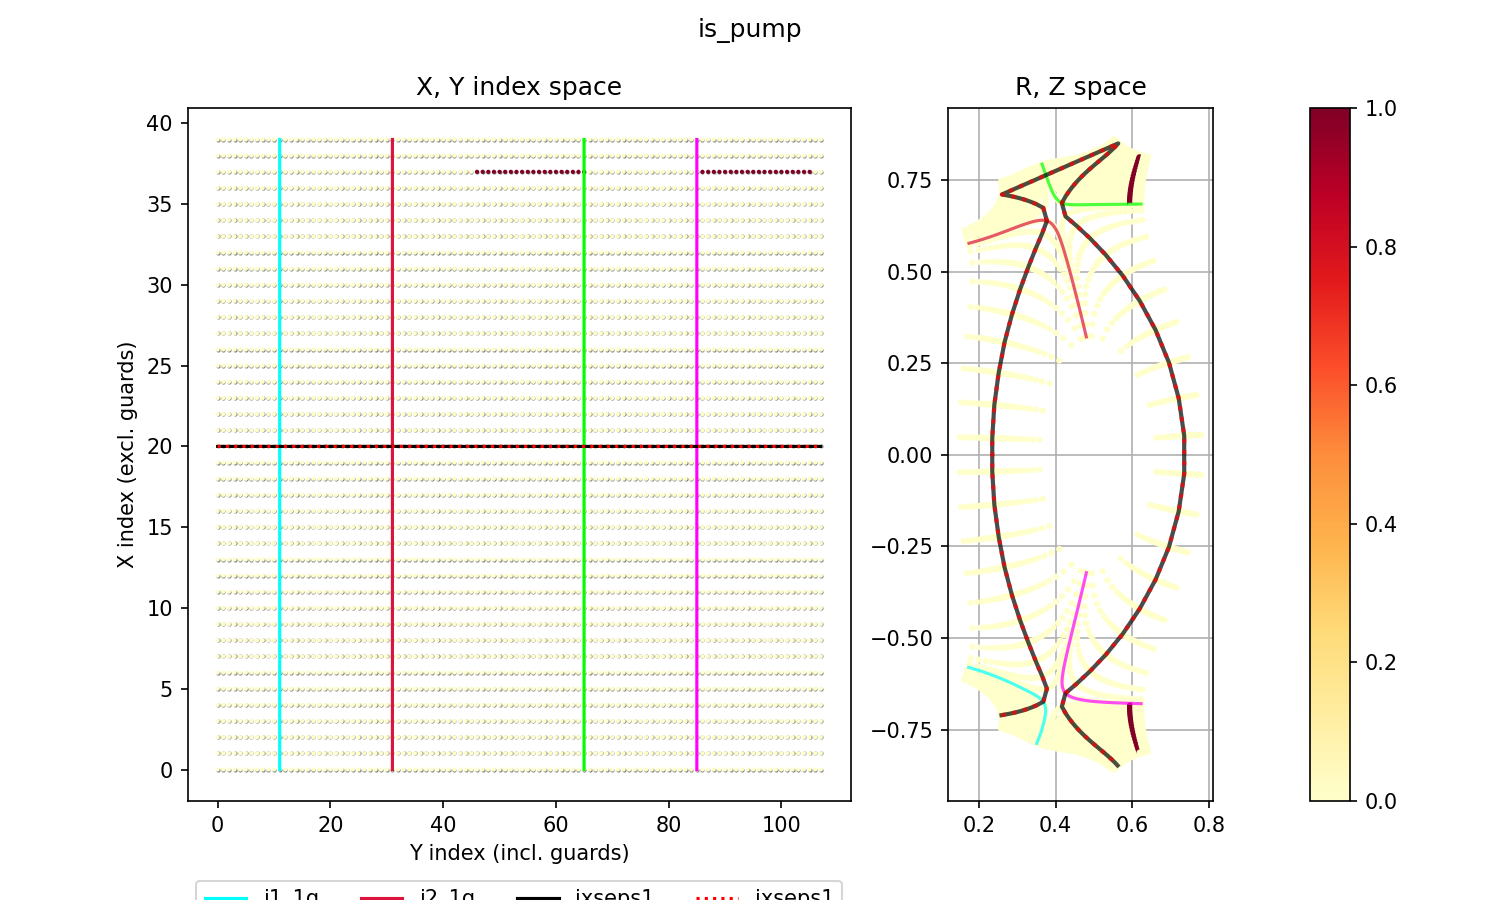

In [34]:
plt.close("all")
%matplotlib widget
mesh = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc")
plt.close("all")

is_pump = Field("is_pump", mesh)
# is_pump.data[:,:] = 10

# is_pump.set_value([slice(None,None), slice(None,None)], 0, make_per_volume = False)
is_pump.data[ (-3, np.r_[
    slice((-mesh.MYG-20),-mesh.MYG), 
    slice(mesh.ny_inner + mesh.MYG*3,mesh.ny_inner + mesh.MYG*3 + 20 )
             ]) ] = 1.0

is_pump.plot(dpi = 150)

mesh.mesh.write("is_pump", is_pump.data, info = True)
mesh.close()

In [60]:
mesh = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f7-soledge_puff.nc")

[print(x) for x in mesh.mesh.keys()]

mesh.close()

nx
ny
y_boundary_guards
curvature_type
Bt_axis
psi_axis
psi_bdry
psi_axis_gfile
psi_bdry_gfile
Rxy
Rxy_xlow
Rxy_ylow
Zxy
Zxy_xlow
Zxy_ylow
psixy
psixy_xlow
psixy_ylow
dx
dx_xlow
dx_ylow
dy
dy_xlow
dy_ylow
poloidal_distance
poloidal_distance_xlow
poloidal_distance_ylow
Brxy
Brxy_xlow
Brxy_ylow
Bzxy
Bzxy_xlow
Bzxy_ylow
Bpxy
Bpxy_xlow
Bpxy_ylow
Btxy
Btxy_xlow
Btxy_ylow
Bxy
Bxy_xlow
Bxy_ylow
hy
hy_xlow
hy_ylow
dphidy
dphidy_xlow
dphidy_ylow
ShiftTorsion
ShiftTorsion_xlow
ShiftTorsion_ylow
zShift
zShift_xlow
zShift_ylow
g11
g11_xlow
g11_ylow
g22
g22_xlow
g22_ylow
g33
g33_xlow
g33_ylow
g12
g12_xlow
g12_ylow
g13
g13_xlow
g13_ylow
g23
g23_xlow
g23_ylow
J
J_xlow
J_ylow
g_11
g_11_xlow
g_11_ylow
g_22
g_22_xlow
g_22_ylow
g_33
g_33_xlow
g_33_ylow
g_12
g_12_xlow
g_12_ylow
g_13
g_13_xlow
g_13_ylow
g_23
g_23_xlow
g_23_ylow
curl_bOverB_x
curl_bOverB_x_xlow
curl_bOverB_x_ylow
curl_bOverB_y
curl_bOverB_y_xlow
curl_bOverB_y_ylow
curl_bOverB_z
curl_bOverB_z_xlow
curl_bOverB_z_ylow
bxcvx
bxcvx_xlow
bxcvx_yl